In [49]:
import pandas as pd
import numpy as np
import os
import time
import src.models.LGBM_next_step as LGBM1step
import src.models.LGBM_avg as LGBMavg
import src.data_processing.load_data as loaddata

<AxesSubplot:>

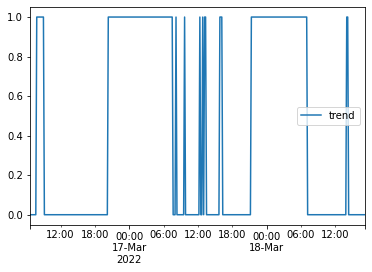

In [84]:
sleep, time0 = loaddata.get_sleep('12/06/2021', '../../data/')

forecast_period = 2 * 24 * 6
DATA_PATH = '../../data/'

prediction1 = LGBM1step.forecast(sleep, time0, DATA_PATH, forecast_period)
prediction2 = LGBMavg.forecast(sleep, time0, forecast_period)
prediction1.plot()

<AxesSubplot:>

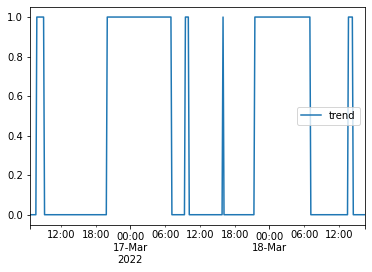

In [97]:
newpred = (smooth(prediction1, conv) + smooth(prediction2, conv))/2
newpred.trend = (newpred.trend > 0.5).astype(int)
newpred.plot()

In [86]:
def smooth(prediction, conv):
    n = prediction.shape[0]
    predvals = prediction.trend.tolist()
    sm_prediction = prediction.copy()

    for i in range(n - 68):
        sm_prediction.iloc[65 + i] = np.dot(predvals[65 + i - 2 : 65 + i + 3], conv)

    return sm_prediction[: -4]

<AxesSubplot:>

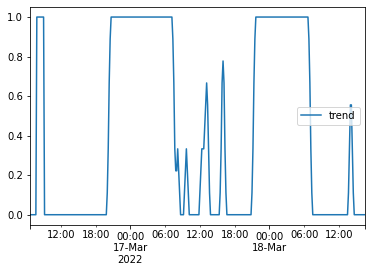

In [94]:
conv = np.array([1, 2, 3, 2, 1])
conv = conv / conv.sum()
smsm = smooth(prediction1, conv)
smsm.plot()

<AxesSubplot:>

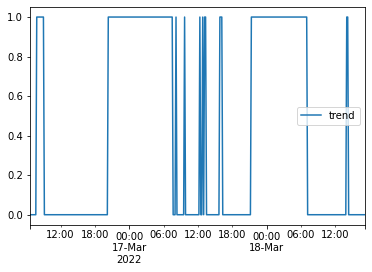

In [95]:
prediction1.plot()

In [70]:
conv

array([0.00980392, 0.01960784, 0.98039216, 0.01960784, 0.00980392])

In [18]:
prediction.iloc[10] = 1
prediction

,trend
2022-03-16 06:40:00,0
2022-03-16 06:50:00,0
2022-03-16 07:00:00,0
2022-03-16 07:10:00,0
2022-03-16 07:20:00,0
...,...
2022-03-18 16:30:00,0
2022-03-18 16:40:00,0
2022-03-18 16:50:00,0
2022-03-18 17:00:00,0


In [36]:
conv = np.array([1, 2, 3, 2, 1])/9
np.dot(prediction.trend.tolist()[6-2:6+3], conv)

0.3333333333333333

In [30]:
DATA_PATH = '../../data/raw/csv/'
modtimesec = os.path.getmtime(os.path.join(DATA_PATH, 'Alisa_sleep.csv'))
modtime = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(modtimesec))
print(modtime)

2022-03-16 17:23:12


In [31]:
DATA_PATH = '../../data/raw/csv/'
data = pd.read_csv(os.path.join(DATA_PATH, 'Alisa_sleep.csv'), parse_dates = ['Time'], index_col = 'Time')
data.columns = ['baby', 'duration', 'note']
data = data.drop(['baby', 'note'], axis = 1)
data = data[data.duration >= 30]
print(data.head())
data.info()

                     duration
Time                         
2022-03-16 14:25:00       135
2022-03-16 07:27:00        73
2022-03-16 02:55:00       100
2022-03-15 21:00:00       335
2022-03-15 13:40:00       140
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 592 entries, 2022-03-16 14:25:00 to 2021-12-07 01:00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   duration  592 non-null    int64
dtypes: int64(1)
memory usage: 9.2 KB
